In [ ]:
import pandas as pd


In [5]:
data=pd.read_csv('spam.csv',encoding='latin-1')

In [6]:
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [7]:
dataset = data.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis=1)
dataset.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [8]:
dataset.rename(columns={'v1': 'label', 'v2': 'Message'}, inplace=True)
dataset.head()

,label,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [9]:
dataset.shape


(5572, 2)

In [10]:
dataset.isnull().sum()

label      0
Message    0
dtype: int64

In [11]:
df=pd.DataFrame(dataset)
spams=df[df['label']=='spam']
hams=df[df['label']=='ham']
print(spams.shape)
print(hams.shape)

(747, 2)
(4825, 2)


In [12]:
spams

,label,Message
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
5,spam,FreeMsg Hey there darling it's been 3 week's n...
8,spam,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...
11,spam,"SIX chances to win CASH! From 100 to 20,000 po..."
...,...,...
5537,spam,Want explicit SEX in 30 secs? Ring 02073162414...
5540,spam,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...
5547,spam,Had your contract mobile 11 Mnths? Latest Moto...
5566,spam,REMINDER FROM O2: To get 2.50 pounds free call...


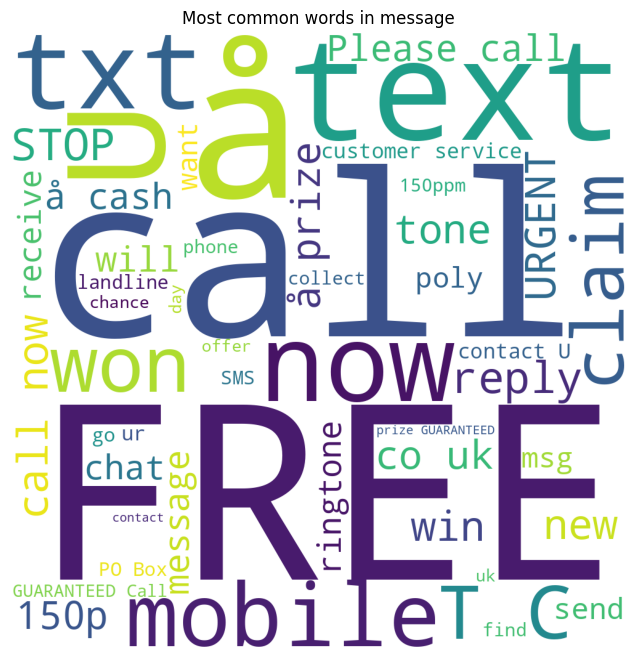

In [13]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
wordcloud = WordCloud(background_color='white',width = 1000, height = 1000,max_words=50).generate(spams['Message'].str.cat(sep=' '))
plt.figure(figsize=(10,8))
plt.title('Most common words in message')
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

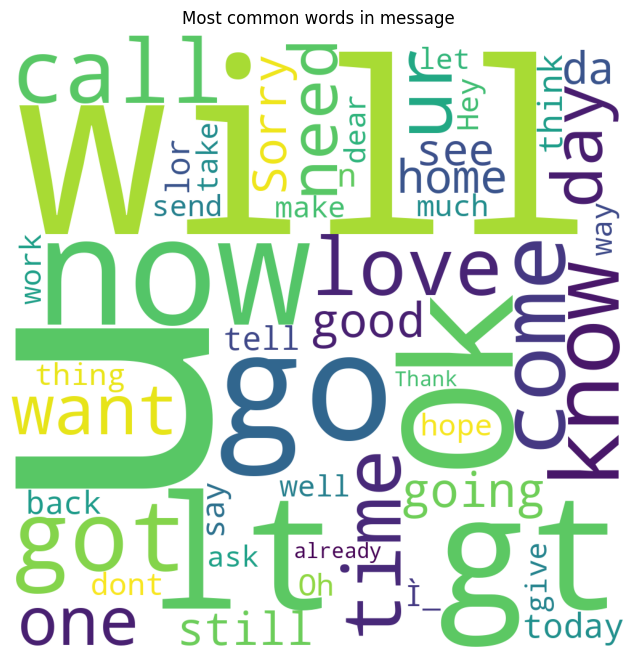

In [14]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
wordcloud = WordCloud(background_color='white',width = 1000, height = 1000,max_words=50).generate(hams['Message'].str.cat(sep=' '))
plt.figure(figsize=(10,8))
plt.title('Most common words in message')
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [15]:
import nltk
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
nltk.download('stopwords')
nltk.download('wordnet')
englishwords=stopwords.words('english')
lemmatizer = WordNetLemmatizer()
corpus=[]
for i in range(0,len(dataset)):
  rev=dataset['Message'][i]
  rev=re.sub('[^a-zA-Z]',' ',rev)
  rev=rev.lower()
  rev=rev.split()
  rev=[lemmatizer.lemmatize(word) for word in rev if not word in set(englishwords)]
  rev=' '.join(rev)
  corpus.append(rev)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [16]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()
x=cv.fit_transform(corpus).toarray()
y=dataset.iloc[:,0].values
print(x.shape)
print(y.shape)

(5572, 7021)
(5572,)


In [17]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)


In [18]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)


(4457, 7021)
(1115, 7021)
(4457,)
(1115,)


In [20]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

In [21]:
import numpy as np
print(np.min(x_train))
print(np.max(x_train))


-0.31620989537433347
66.7532770731158


In [23]:
from sklearn.naive_bayes import GaussianNB
classifier=GaussianNB()
classifier.fit(x_train,y_train)



GaussianNB()

In [24]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(x_train,y_train)


LogisticRegression()

In [25]:
from sklearn.svm import SVC
svc=SVC()
svc.fit(x_train,y_train)

SVC()

In [26]:
y_pred=lr.predict(x_test)
y_pred_classifier=classifier.predict(x_test)
y_pred_svc=svc.predict(x_test)

In [30]:
from sklearn.metrics import accuracy_score
score=accuracy_score(y_test,y_pred)
score_classifier=accuracy_score(y_test,y_pred_classifier)
score_svc=accuracy_score(y_test,y_pred_svc)

In [31]:
print("Testing Accuracy of logistic Regression is :",score) #Best Performing Model
print("Testing Accuracy of Navie Bayes Classifier is :",score_classifier)
print("Testing Accuracy SVM is :",score_svc)

Testing Accuracy of logistic Regression is : 0.9721973094170404
Testing Accuracy of Navie Bayes Classifier is : 0.8654708520179372
Testing Accuracy SVM is : 0.9533632286995516
